# Importing all the required libraries!

In [30]:
import pandas as pd
import numpy as np
import os, glob
import csv
import math
import xml.etree.ElementTree as ET
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import matplotlib.pyplot as plt
import matplotlib.patches as patches


Using TensorFlow backend.


# Getting Dataset 

In [21]:
train_df=pd.read_csv('training.csv')

In [22]:
test_df = pd.read_csv('test.csv')

In [23]:
train_df.head(10)

,image_name,x1,x2,y1,y2
0,JPEG_20160706_121146_1000145715002.png,115,495,143,325
1,JPEG_20161119_174038_1000690577600.png,23,457,61,409
2,147444927651111470309333776-Roadster-Men-Casua...,37,601,13,470
3,147772332675720161028_161611.png,27,602,162,385
4,1473315333651DeeplearnS11638.png,60,586,174,325
5,JPEG_20161129_143914_1000304878557.png,35,549,37,442
6,JPEG_20161028_100621_1000815239330.png,77,558,86,434
7,1475060075141DSC02381.png,50,627,95,320
8,1473317734429DeeplearnS142.png,104,552,83,428
9,JPEG_20160607_153530_1000669241198.png,134,500,67,429


In [24]:
## Names of image files
image_names = train_df.iloc[:,0].values

In [25]:
## Left co-ordinate of X
xl = train_df.iloc[:,1].values
## Right co-ordinate of X
xr = train_df.iloc[:,2].values

## Lower co-ordinate of Y
yd = train_df.iloc[:,3].values
## Upper co-ordinate of Y
yu = train_df.iloc[:,4].values

In [26]:
image_names

array(['JPEG_20160706_121146_1000145715002.png',
       'JPEG_20161119_174038_1000690577600.png',
       '147444927651111470309333776-Roadster-Men-Casual-Shoes-3041470309333487-1.png',
       ..., 'JPEG_20161209_144221_1000965510278.png',
       '1469616355586JPEG_20160625_121504_1000332225062.png',
       'JPEG_20160711_125046_1000355681348.png'], dtype=object)

In [27]:
train_img_list = glob.glob("images/*")

In [28]:
len(train_img_list)

56791

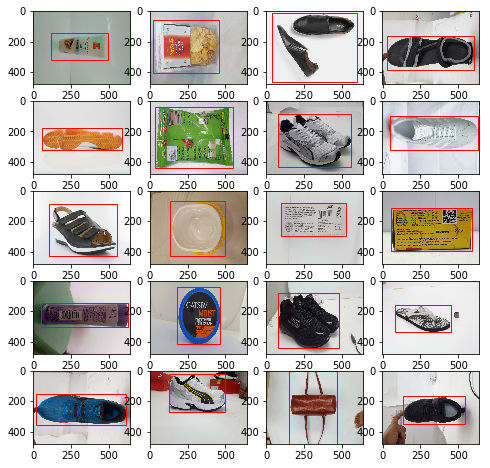

In [31]:
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns * rows + 1):
    img = plt.imread("images/"+image_names[i-1])
    ax = fig.add_subplot(rows, columns, i)
    rect = patches.Rectangle((train_df.iloc[i-1, 1], train_df.iloc[i-1, 3]), train_df.iloc[i-1, 2]-train_df.iloc[i-1, 1], train_df.iloc[i-1, 4]-train_df.iloc[i-1, 3], linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    plt.imshow(img)
plt.show()

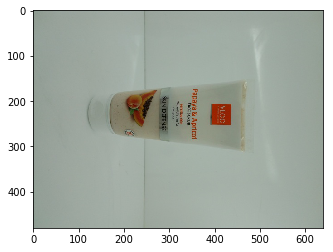

In [32]:
img = plt.imread("images/" + image_names[0])
chunks = 5
rows = chunks
cols = chunks
plt.imshow(img)


In [15]:
def chunk(chunks):
    height = 640
    width = 480
    wd = width / chunks
    ht = height / chunks
    arr = []

    for i in range(0, chunks):
        for j in range(0, chunks):
            arr.append((int(i * wd), int(j * ht)))

    return arr

In [16]:
chunks = 5
rows = 4
cols = 5

In [17]:
fig1 = plt.figure(figsize=(8, 8))
chunkSegment = chunk(chunks)
print(chunkSegment)

NameError: name 'plt' is not defined

In [18]:
for i in range(1, rows * cols + 1):
    segment = img[chunkSegment[i - 1][0]:chunkSegment[i - 1][0] + int(480 / chunks),
              chunkSegment[i - 1][1]:chunkSegment[i - 1][1] + int(640 / chunks), :]
    print(chunkSegment[i - 1][0],chunkSegment[i - 1][0] + int(480 / chunks),chunkSegment[i - 1][1],chunkSegment[i - 1][1] + int(640 / chunks))

NameError: name 'img' is not defined

# Defining variables and constants

In [19]:
#Image size is 480x640
classes = [0,1]

#Segmenting images and storing in list
imageSegment = []

#Defining class for each segment
segmentClasses = []